# 导入相关依赖库

In [51]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
import xgboost as xgb
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# 导入数据

In [37]:
data = np.genfromtxt('LeukemiaDataSet3.dat', delimiter='  ', dtype=str)

{'1.0000000e+00', '0.0000000e+00', '2.0000000e+00'}


# 数据预处理模块

In [3]:
def Normalized(arr):
    arr = arr.astype(float)
    normalized_arr = (arr - arr.min(axis=0)) / (arr.max(axis=0) - arr.min(axis=0))
    return normalized_arr

In [56]:
X = Normalized(data[:, 1:])
y = data[:, 0]
float_list = [float(num) for num in y]
y = [int(num) for num in float_list]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 评估不同模型的效果

## 决策树模型

In [63]:
dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X_train, y_train)
y_pred_dt = dt_classifier.predict(X_test)
dt_accuracy = accuracy_score(y_test, y_pred_dt)
print(dt_accuracy)

0.7727272727272727


## 随机森林模型

In [62]:
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)
y_pred_rf = rf_classifier.predict(X_test)
rf_accuracy = accuracy_score(y_test, y_pred_rf)
print(rf_accuracy)

0.8181818181818182


## adaboosting模型

In [61]:
ada_clf = AdaBoostClassifier(n_estimators=100, learning_rate=1, random_state=42)
ada_clf.fit(X_train, y_train)
y_pred_ada = ada_clf.predict(X_test)
ada_accuracy = accuracy_score(y_test, y_pred_ada)
print(ada_accuracy)

C:\Users\10391\AppData\Roaming\Python\Python311\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


0.8636363636363636


## GBDT模型

In [60]:
gbdt_clf = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
gbdt_clf.fit(X_train, y_train)
y_pred_gbdt = gbdt_clf.predict(X_test)
gbdt_accuracy = accuracy_score(y_test, y_pred_gbdt)
print(gbdt_accuracy)

0.9090909090909091


## xgboosting模型

In [59]:
xgb_clf = xgb.XGBClassifier(objective='multi:softmax', num_class=X_train.shape[1], n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
xgb_clf.fit(X_train, y_train)
y_pred_xgb = xgb_clf.predict(X_test)
xgb_accuracy = accuracy_score(y_test, y_pred_xgb)

0.9545454545454546


## 结果可视化

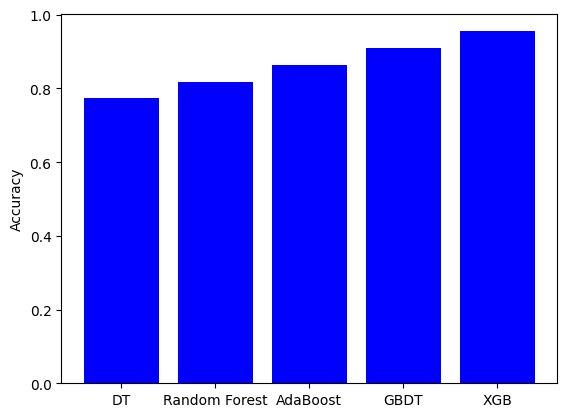

In [65]:
x = ['DT', 'Random Forest', 'AdaBoost', 'GBDT', 'XGB']
accuracy = [dt_accuracy, rf_accuracy, ada_accuracy, gbdt_accuracy, xgb_accuracy]
plt.bar(x, accuracy, color='blue')
plt.ylabel('Accuracy')
plt.show()

# 探究不同基学习器对模型训练效果的影响（以xgboosting模型为例）

## gbtree基学习器

In [71]:
xgb_clf_tree = xgb.XGBClassifier(objective='multi:softmax', num_class=X_train.shape[1], n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
xgb_clf_tree.fit(X_train, y_train)
y_pred_xgb_tree = xgb_clf_tree.predict(X_test)
xgb_accuracy_tree = accuracy_score(y_test, y_pred_xgb_tree)
print(xgb_accuracy_tree)

0.9545454545454546


## dart基学习器

In [77]:
xgb_clf_dart = xgb.XGBClassifier(objective='multi:softmax', num_class=X_train.shape[1], booster='dart', n_estimators=100, learning_rate=0.1, random_state=42)
xgb_clf_dart.fit(X_train, y_train)
y_pred_xgb_dart = xgb_clf_dart.predict(X_test)
xgb_accuracy_dart = accuracy_score(y_test, y_pred_xgb_dart)
print(xgb_accuracy_dart)

0.9545454545454546


## gblinear基学习器

In [75]:
xgb_clf_gblinear = xgb.XGBClassifier(objective='multi:softmax', num_class=X_train.shape[1], booster='gblinear', n_estimators=100, learning_rate=0.1, random_state=42)
xgb_clf_gblinear.fit(X_train, y_train)
y_pred_xgb_gblinear = xgb_clf_gblinear.predict(X_test)
xgb_accuracy_gblinear = accuracy_score(y_test, y_pred_xgb_gblinear)
print(xgb_accuracy_gblinear)

0.9090909090909091


## 结果可视化

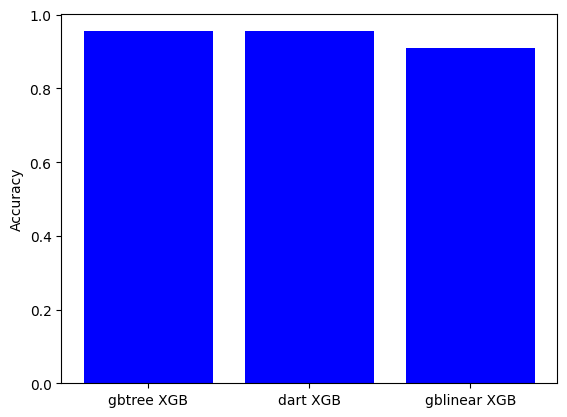

In [78]:
x = ['gbtree XGB', 'dart XGB', 'gblinear XGB']
accuracy = [xgb_accuracy_tree, xgb_accuracy_dart, xgb_accuracy_gblinear]
plt.bar(x, accuracy, color='blue')
plt.ylabel('Accuracy')
plt.show()

# 使用soft、hard方法分别集成多个不同的基本分类器，分析比较结果

In [79]:
clf1 = DecisionTreeClassifier(random_state=2)
clf2 = SVC(probability=True, random_state=42)
clf3 = RandomForestClassifier(n_estimators=100, random_state=42)

In [80]:
clf1.fit(X_train, y_train)
y_pred_dt = clf1.predict(X_test)
dt_accuracy = accuracy_score(y_test, y_pred_dt)

In [81]:
clf2.fit(X_train, y_train)
y_pred_SVC = clf2.predict(X_test)
SVC_accuracy = accuracy_score(y_test, y_pred_SVC)

In [82]:
clf3.fit(X_train, y_train)
y_pred_rf = clf3.predict(X_test)
rf_accuracy = accuracy_score(y_test, y_pred_rf)

In [83]:
soft_voting_clf = VotingClassifier(estimators=[('lr', clf1), ('svc', clf2), ('rf', clf3)], voting='soft')
soft_voting_clf.fit(X_train, y_train)
y_pred_soft = soft_voting_clf.predict(X_test)
soft_accuracy = accuracy_score(y_test, y_pred_soft)

In [84]:
hard_voting_clf = VotingClassifier(estimators=[('lr', clf1), ('svc', clf2), ('rf', clf3)], voting='hard')
hard_voting_clf.fit(X_train, y_train)
y_pred_hard = hard_voting_clf.predict(X_test)
hard_accuracy = accuracy_score(y_test, y_pred_hard)

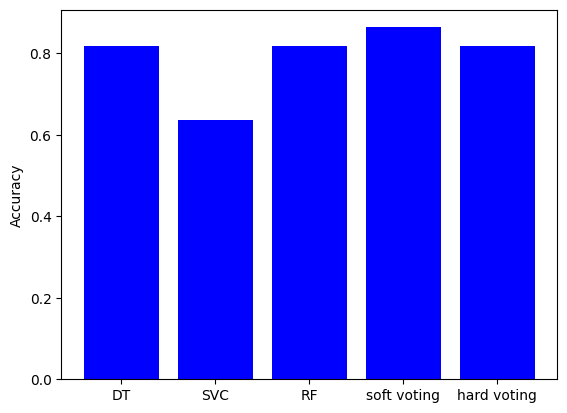

In [85]:
x = ['DT', 'SVC', 'RF', 'soft voting', 'hard voting']
y = [dt_accuracy, SVC_accuracy, rf_accuracy, soft_accuracy, hard_accuracy]
plt.bar(x, y, color='blue')
plt.ylabel('Accuracy')
plt.show()

# 加权集成

In [86]:
clf1 = DecisionTreeClassifier(random_state=2)
clf2 = SVC(probability=True, random_state=42)
clf3 = RandomForestClassifier(n_estimators=100, random_state=42)
scores = [cross_val_score(estimator, X_train, y_train, scoring='accuracy') for estimator in [clf1, clf2, clf3]]
sum_of_elements = [np.sum(array) for array in scores]
weights = [element / sum(sum_of_elements) for element in sum_of_elements]
voting_clf = VotingClassifier(estimators=[('rf', clf1), ('svc', clf2), ('dt', clf3)], voting='soft', weights=weights)
voting_clf.fit(X_train, y_train)
y_pred_voting = voting_clf.predict(X_test)
voting_accuracy = accuracy_score(y_test, y_pred_voting)

[0.8636363636363636, 0.8181818181818182, 0.8636363636363636]


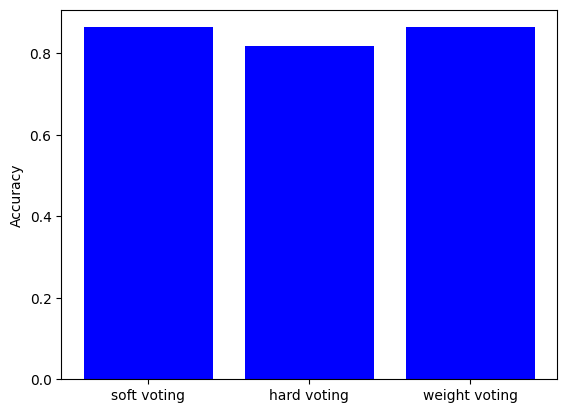

In [88]:
x = ['soft voting', 'hard voting', 'weight voting']
y = [soft_accuracy, hard_accuracy, voting_accuracy]
plt.bar(x, y, color='blue')
plt.ylabel('Accuracy')
plt.show()